<!-- <img style="display: block; width: 100vw; height: 350px; object-fit: cover; object-position: center 20%;" src="images/Studio_del_Corpo_Umano_-_Leonardo_da_Vinci.png">
 -->
<img width ="100%" height= "350px" class="banner" src="images/Studio_del_Corpo_Umano_-_Leonardo_da_Vinci.png">

# Ciągi 
W pewnym uproszczeniu ciągi to jakieś liczby wypisane po kolei.
$$ 1,2,3,42,0,0,0,\ldots$$
Wśród elementów ciągu $a$ możemy z łatwością wyróżnić element pierwszy $a_1$, drugi $a_2$, itd.
Jest to najważniejsza właśność dotycząca ciągów, a zresztą inne własności dotyczące ciągów związane są jedynie z pewnymi szczególnymi przypadkami i wymagają dodatkowych założeń.

## Ciągi arytmetyczne
Są to ciągi, w których każdy następny element powstał przez dodanie do poprzedniego elementu jakiejś stałej liczby oznaczanej czasem jako $r$. 
$$ 1,2,3,4,5,6,\ldots$$
Skoro ciągi arytmetyczne powstają w taki sposób, to wystarczy znać $a_1$ i $r$, by wiedzieć o nim wszystko. Element stojący na $n$-tym miejscu powstał przez dodanie do elementu $a_1$ $r$ $(n-1)$-razy:
$$ a_n = a_1 + (n-1)\cdot r$$
Jest to tzw. **wzór ogólny** ciągu arytmetycznego.

#### Inne własności
Dlaczego tak właściwie te ciągi nazywane są arytmetyczne? Związane jest to z tym, że dla dowolnego naturalnego $k>1$ zachodzi poniższa własność:
$$a_k=\frac{a_{k-1}+a_{k+1}}{2}$$
Innymi słowy $a_k$ jest średnią arytmetyczną elementu poprzedniego i następnego.

Ponadto, sumę $k$ początkowych elementów takiego ciągu można obliczyć w następujący sposób:
$$S_k=\frac{a_1+a_k}{2}\cdot n$$

In [2]:
def ciag_arytmetyczny(a1,r):
    value=a1
    while True:
        yield value
        value += r

a=ciag_arytmetyczny(1,2)
print(*[next(a) for _ in range(100)])
        

1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95 97 99 101 103 105 107 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199


## Ciągi geometryczne
Są to ciągi, w których każdy następny element powstał przez pomnożenie poprzedniego elementu przez jakąś stałą liczbę oznaczaną czasem jako $q$. 
$$ 1,2,4,8,16,32,\ldots$$
W tym wypadku wystarczy znać $a_1$ i $q$. Element stojący na $n$-tym miejscu powstał przez pomnożenie pierwszego elementu $(n-1)$-razy przez $q$:
$$ a_n = a_1\cdot q^{n-1}$$
Jest to tzw. **wzór ogólny** ciągu geometrycznego.

#### Inne własności
Dla dowolnego naturalnego $k>1$ zachodzi poniższa własność:
$$a_k=\sqrt{a_{k-1}\cdot a_{k+1}}$$
Innymi słowy $a_k$ jest średnią geometryczną elementu poprzedniego i następnego.

Ponadto, sumę $k$ początkowych elementów takiego ciągu można obliczyć w następujący sposób:
$$S_k=\begin{cases} 
a_1\cdot \frac{1-q^k}{1-q}& \text{dla } q\ne 1\\ 
a_1\cdot k& \text{dla } q = 1 
\end{cases}$$

Jeżeli $|q|<1$, to jesteśmy w stanie obliczyć nawet sumę wszystkich elementów takiego ciągu i wynosi ona:
$$S_{\infty}=\frac{a_1}{1-q}$$

In [3]:
def ciag_geometryczny(a1,q):
    value=a1
    while True:
        yield value
        value *= q
        
b=ciag_geometryczny(1,2)
for n in range(1,10):
    print('b{}={}'.format(n, next(b)))

b1=1
b2=2
b3=4
b4=8
b5=16
b6=32
b7=64
b8=128
b9=256


### Procent prosty
Pojęcie to związane jest z oprocentowaniem kapitału $K_0$ w którym dochód w postaci odsetek nie jest doliczany do kwoty, z której będą one obliczane w następnym okresie kapitalizacji odsetek. 
#### Wstęp teoretyczny
Oznacza to, że w każdym okresie są one obliczane od tej samej kwoty, a więc odsetki q będą wynosiły:
$$d=\frac{p}{100}\cdot K_0$$
gdzie **p%** jest stopą procentową dla omawianego okresu kapitalizacji*.

Stąd wynika, że po upływie $n$ okresów kapitalizacji odsetek dochód uzyskany z odsetek wynosi:
$n\cdot d=n\cdot\frac{p}{100}\cdot K_0$,
a więc kapitał końcowy $K_n$ wynosi:
$$ 
\begin{align}
K_n&=K_0+n\cdot\frac{p}{100}\cdot K_0=\\
&=K_0\cdot(1+n\cdot\frac{p}{100})
\end{align}
$$

###### \* Dla stopy rocznej wynoszącej 9% i czteromiesięcznego okresu kapitalizacji, stopą procentową jest p=3%. Czy domyślasz się dlaczego?

In [8]:
def procent_prosty(kapital_poczatkowy, oprocentowanie):
    Kp=kapital_poczatkowy
    p=oprocentowanie
    
    n=0
    d=0
    while True:
        yield n, Kp+d
        d += (p/100)*Kp
        n +=1
lokata1 = procent_prosty(1000, 2/3)


def kapitalizacja(lokata):
    okres, kapital = next(lokata)    
    print("{0}. {1:.2f} zł".format(okres, kapital, lokata.__name__))
        
for _ in range(10):
    kapitalizacja(lokata1)

0. 1000.00 zł
1. 1006.67 zł
2. 1013.33 zł
3. 1020.00 zł
4. 1026.67 zł
5. 1033.33 zł
6. 1040.00 zł
7. 1046.67 zł
8. 1053.33 zł
9. 1060.00 zł


### Procent składany
W tym przypadku odsetki obliczane są z kwoty uwzględniające dotychczasowe odsetki.

####  Wstęp teoretyczny
Przyjrzyjmy się temu procesowi. Jeśli kapitał początkowy wynosi $K_0$, a odpowiednia stopa procentowa związana z ich kapitalizacją wynosi **p%**, to po pierwszym okresie kapitalizacji kapitał wynosić będzie
$$
\begin{align}
K_1&=K_0+\frac{p}{100}\cdot K_0=\\
&=K_0\cdot\left(1+\frac{p}{100}\right)
\end{align}
$$

Zauważmy, że widać tu wyraźnie, że do jakiegoś kapitału bazowego (w tym wypadku $K_0$) doliczona została kwota wynikająca z odsetek. Gdyby od tych odsetek należało odliczyć podatek, to należy zająć się tym w części związanej z odsetkami (np. dla podatku wynoszącego **10%** odsetek pojawiłoby się tam $\ldots+\frac{90}{100}(\frac{p}{100}\cdot K_0)\ldots$ 


Co się dzieje w następnym okresie? Cóż, sytuacja będzie dość podobna, jednak odsetki będą tu obliczane z kwoty $K_1$ zamiast $K_0$, bo tyle obecnie posiadamy na lokacie. Wobec tego posiadany kapitał powinien wynosić (ostatnie przekształcenie dotyczy podstawienia w miejsce $K_1$ tego, co wyszło w punkcie poprzednim):
$$
\begin{align}
K_2&=K_1+\frac{p}{100}\cdot K_1=\\
&=K_1\cdot\left(1+\frac{p}{100}\right)=\\
&=K_0\cdot\left(1+\frac{p}{100}\right)^2
\end{align}
$$
*.*


Okazuje się, że dla $n=3$ też wychodzi podobnie:
$$
\begin{align}
K_3&=K_2+\frac{p}{100}\cdot K_2=\\
&=K_2\cdot\left(1+\frac{p}{100}\right)=\\
&=K_0\cdot\left(1+\frac{p}{100}\right)^3
\end{align}
$$

I tak dalej.
Myślę, że chyba każdy się już spodziewa, że w dowolnym sensownym $n$–tym okresie kapitalizacji kapitał $K_n$ powinno dać się wyliczyć z poniższego wzoru:
$$K_n = K_0\cdot\left(1+\frac{p}{100}\right)^n$$


In [5]:
def procent_skladany(kapital_poczatkowy, oprocentowanie):
    Kp=kapital_poczatkowy
    p=oprocentowanie
    
    n=0
    while True:
        yield n, Kp
        Kp += (p/100)*Kp
        n +=1
        
lokata2 = procent_skladany(1000, 2/3)
for _ in range(10):
    kapitalizacja(lokata2)    


0. 1000.00 zł
1. 1006.67 zł
2. 1013.38 zł
3. 1020.13 zł
4. 1026.93 zł
5. 1033.78 zł
6. 1040.67 zł
7. 1047.61 zł
8. 1054.59 zł
9. 1061.63 zł


## Ciągi definiowane rekurencyjnie
Ciągi można też definiować rekurencyjnie, przez podanie kilku pierwszych elementów oraz wzoru, który pozwala otrzymać wartość elementu następnego z wartości poprzednich. Np. 
$$ a_n = 
\begin{cases}
0, &n=1\\
a_{n-1}+1, &n\ne 1
\end{cases}
%
\qquad
%
b_n = 
\begin{cases}
1, &n=1\\
2a_{n-1}, &n\ne 1
\end{cases}
%
\qquad
%
c_n = 
\begin{cases}
6, &n=1\\
5a_{n-1}-3, &n\ne 1
\end{cases}
%
\qquad
%
d_n = 
\begin{cases}
1, &n=1 \lor n=2\\
a_{n-1}+a_{n-2}, &n>2
\end{cases}
$$

In [32]:
def ciag_rekurencyjny(a1, succ=lambda an: an):
    value=a1
    while True:
        yield value
        value = succ(value)
        
a=ciag_rekurencyjny(1, succ=lambda an: an+1)
b=ciag_rekurencyjny(1, succ=lambda an: an*2)
c=ciag_rekurencyjny(6, succ=lambda an: 5*an-3)

def ciag_fib():
    a,b=1,1
    while True:
        yield a
        a,b = b, a+b
        
d=ciag_fib()

display(', '.join([str(next(a)) for _ in range(10)])+', ...')
display(', '.join([str(next(b)) for _ in range(10)])+', ...')
display(', '.join([str(next(c)) for _ in range(10)])+', ...')
display(', '.join([str(next(d)) for _ in range(30)])+', ...')

'1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...'

'1, 2, 4, 8, 16, 32, 64, 128, 256, 512, ...'

'6, 27, 132, 657, 3282, 16407, 82032, 410157, 2050782, 10253907, ...'

'1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, ...'

## Granica ciągu
Mówimy, że liczba $g$ jest granicą ciągu $a$, gdy 
$$\forall_{\varepsilon>0}\exists_{k_0\in\mathbb{N}}\forall_{k>k_0} |a_k-g| \leq \varepsilon$$

### Intuicja
Najłatwiej zrozumieć to na przykładzie. Rozważmy ciąg $a_n=\frac1n$. Przyjrzyjmy się jego początkowym elementom:

In [106]:
from ipywidgets import interactive_output, Label, Textarea, VBox, HBox, Output
import numpy as np
import matplotlib.pyplot as plt

span=(1,255)
def sequence(n, function):
    X=np.linspace(1,n+1,n)
    Y=function(X)
    _, maxX = span
    fullY=function(np.linspace(1,maxX+1,maxX))
    
    plt.scatter(X,Y)
    plt.axline(xy1=(0,0), slope=0, ls='--', color='r')
    plt.axis([0,maxX,1.1*min(fullY),1.1*max(fullY)])
    
    plt_output = Output()
    val_output = Textarea(', '.join([f'{y:>2.4}' for y in Y]), layout=Layout(width='50%',height='250px'))
    with plt_output:
        plt.show()
    display(HBox([plt_output, val_output]))

widget=interactive(sequence, n=span, function={'1/n':lambda x: 1/x, 'sin(n)/n':lambda x: np.sin(x)/x, 'sin(n)':lambda x: np.sin(x)})
widget.children[0].value=0
widget.children[0].continuous_update=False
VBox([widget.children[1], widget.children[-1], widget.children[0]])

$$a_1=1, \;a_2=\frac12, \;a_3=\frac13, \;\ldots\; a_{100000}=0.00001, \;\ldots$$ 

wyraźnie widać, że ciąg ten "wydaje się zmierzać do zera"... tylko co to właściwie znaczy? Można powiedzieć, że "od pewnego miejsca" wszystkie wartości tego ciągu na pewno "będą blisko tej wartości". Dowolnie blisko. Do tego właśnie odnosi się $\varepsilon$ z powyższej definicji. Z kolei $k_0$ wyznacza miejsce od którego tak właśnie będzie. 

##### Nudny formalizm matematyczny
Przypuśćmy, że $\varepsilon=0.1$. Czy istnieje takie $k_0$, że wszystkie elementy $a_k$ dla $k>k_0$ będą różniły się od $g=0$ co o najwyżej $\varepsilon$? Z pewnością -- wystarczy wziąć $k_0=10$, bo dla $k>10$ wartość $a_k<\frac1{10}$. Zatem w tym wypadku zachodzi warunek $|a_k-g|\leq\varepsilon$. 

A co dla innych wartości $\varepsilon$ (a w szczególności tych mniejszych)? Okazuje się, że w każdym przypadku wystarczy wziąć za $k_0$ coś typu $\lceil\frac1\varepsilon\rceil$, żeby powyższy warunek był spełniony. 

Granicą ciągu $a_n=\frac1n$ faktycznie jest 0. Zgadza się to zarówno z naszą intuicją, jak i z definicją, która pojawiła się na samym początku.

### Inne pojęcia pojawiające się w temacie ciągów
##### Wyznacz __miejsca zerowe__ ciągu danego wzorem $a_n=n^2-1$. 
Zwróćmy uwagę, że ciągi to po prostu funkcje, których dziedziną jest jakiś podzbiór liczb naturalnych, które z jakiegoś powodu oznacza się w nieco inny sposób i np. zamiast $a(1)$ pisze się $a_1$.

To spojrzenie ułatwia zrozumieć co może się kryć za pojęciem "miejsca zerowego" ciągu. Będą to bowiem takie $k\in\mathbb{N}$ dla których $a_k=0$... czyli to samo co zwykle.

Okazuje się zatem, że rozwiązanie zadania sprowadza się do rozwiązania poniższego równania:
$$ 
\begin{align*}
0&=n^2-1\\
0&=(n-1)(n+1)\\
&\Rightarrow\; n=-1 \;\lor\; n=1
\end{align*}
$$

__Uwaga!__ Należy tu jednak pamiętać, że $n\in\mathbb{N}$. Ostatecznie wychodzi na to, że miejscem zerowym ciągu $a_n=n^2-1$ jest jedynie $n=1$. Faktycznie $a_1=1^2-1=0$.

##### Ile __wyrazów całkowitych__ posiada ciąg dany wzorem $a_n=\frac{2n^2-7n+100}{n}$?

Wyrazy całkowite to te wyrazy ciągu, które są liczbami całkowitymi, tj. $a_k\in \mathbb{Z}=\{\ldots,-1,0,1,\ldots\}$. 

Nie ma chyba ogólnego sposobu rozwiązywania tego typu zadań, ale zwykle wystarczy w nich troszkę pokombinować. Zauważmy, że wzór tego ciągu zapisać w następujący sposób:
$$ a_n=2n-7+\frac{100}n$$

Z uwagi na to, że $n\in\mathbb{N}$ widać, że jedynym czynnikiem, który mógłby powodować, że wartość tego wyrażenia nie będzie całkowita jest $\frac{100}n$. Jeśli będzie on liczbą całkowitą, to wartość tego wyrażenia także taka będzie i vice versa.

Dla jakich $n$ wartość $\frac{100}{n}$ będzie liczbą całkowitą? Odpowiedzi należy szukać wśród dzielników liczby $100$. O ile tylko $n$ będzie dzielnikiem liczby 100, to wynik dzielenia będzie całkowity.
Wobec tego rozwiązanie tego zadania sprowadza się do policzenia ile jest dzielników liczby $100$. 

Jak tego dokonać? Cóż, jest wiele dróg na ten sam szczyt. Ja preferuję rozwiązanie polegające na rozłożeniu $100$ na czynniki pierwsze. $100=25\cdot4=5^2\cdot 2^2$. Każda liczba będąca dzielnikiem tej liczby będzie zatem postaci $5^a\cdot 2^b$, gdzie $a,b\in\{0,1,2\}$. Wobec tego wszystkich możliwości jest $3\cdot 3=9$. Faktycznie:
$$1, 2, 4, 5, 10, 20, 25, 50, 100$$

Wobec tego wyrazów całkowitych ciągu danego w zadaniu jest 9. Oto one: $a_1, a_2, a_4, a_5, a_{10}, a_{20}, a_{25}, a_{50}, a_{100}$.

# Szeregi

**Szeregi** to ciąg *sum częściowych* innego ciągu:
$$s_n=a_1+a_2+\ldots+a_n$$
gdzie $(a_n)$ jest jakimś ciągiem liczb rzeczywistych. Innymi słowy *szereg* to 

**Sumą szeregu** nazywamy $S\in\mathbb{R}$ będące granicą takich sum częściowych $$S=\lim\limits_{n\to\infty} s_n$$
Jeżeli taka liczba istnieje, to rozważany szereg nazywamy *szeregiem zbieżnym* (sumowalnym), a w przeciwnym wypadku *rozbieżnym* (niesumowalnym).

W przypadku **szeregu geometrycznego** $\sum\limits_{k=1}^\infty a_n$, gdzie $a_n=a_1 q^{n-1}$ jest ciągiem geometrycznym, którego iloraz $q\in(-1,1)$, sumę szeregu można wyznaczyć z poniższego wzoru:
$$S=\frac{a_1}{1-q}$$

## Przykłady
* szereg zbieżny:
$$s=\sum\limits_{k=1}^\infty \frac1{2^n}=\frac12+\frac14+\frac18+\ldots=1$$ 
* szereg rozbieżny ze względu na to, że nie istnieje granica jego sum częściowych:
$$t=\sum\limits_{k=1}^\infty (-1)^n=1+(-1)+1+\ldots =\, ?$$
* szereg rozbieżny do nieskończoności:
$$s=\sum\limits_{k=1}^\infty 1 = 1 + 1 + 1 + \ldots = \infty $$

In [39]:
def szereg_zbiezny():
    sn=0
    an=1
    while True:
        an *= 1/2
        sn += an
        yield sn
        
def szereg_rozbiezny():
    sn=0
    an=1
    while True:
        an *= -1
        sn += an
        yield sn

def szereg_rozbiezny2():
    sn=0
    an=1
    while True:
        an += 1
        sn += an
        yield sn
        
s=szereg_zbiezny()
t=szereg_rozbiezny()
u=szereg_rozbiezny2()

import pandas as pd
df = pd.DataFrame([(next(s), next(t), next(u)) for _ in range(100)], columns=['s_n','t_n','u_n'])
df.index += 1
df.index.rename('n', inplace=True)
df.T

n,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
s_n,0.5,0.75,0.875,0.9375,0.96875,0.984375,0.992188,0.996094,0.998047,0.999023,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
t_n,-1.0,0.00,-1.000,0.0000,-1.00000,0.000000,-1.000000,0.000000,-1.000000,0.000000,...,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0
u_n,2.0,5.00,9.000,14.0000,20.00000,27.000000,35.000000,44.000000,54.000000,65.000000,...,4277.0,4370.0,4464.0,4559.0,4655.0,4752.0,4850.0,4949.0,5049.0,5150.0


### Zadania 

1. Cegła waży 1kg i pół cegły. Ile waży cegła?
$$x=1+\frac{1+\frac{1+\frac{1+\frac{1+\frac{\ldots}{2}}{2}}{2}}{2}}{2}=1+\frac12+\frac14+\ldots+\ldots=\sum\limits_{k=0}^\infty \frac{1}{2^k}$$
2. W kwadracie o boku długości $a$ połączono ze sobą środki kolejnych boków. W ten sposób został utworzony kwadrat, którego środki boków znów połączono ze sobą i tak dalej. Jakie jest pole powierzchni wszystkich utworzonych w ten sposób figur geometrycznych?

<img width ="350px" height= "350px" class="banner" style="margin: auto" src="https://i.imgur.com/FixGEyR.png">
3. Oblicz sumy poniższych szeregów:

a) $7+2.1+0.63+\ldots$
b) $7+2.1+0.63+\ldots$
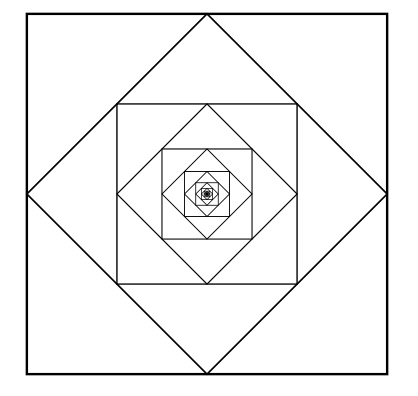